In [1]:
import numpy as np   
from scipy.signal import hamming, firwin, freqz
import matplotlib.pyplot as plt 

In [14]:
N = 101
fc = eval(input('Enter the cutoff frequency = '))
Fs = eval(input('Enter the sampling frequency = '))
FN = 2*fc

In [15]:
wn = hamming(N)
print(f'Normalized digital cutoff frequency = {fc/Fs}')
wc = (fc/Fs)*np.pi
print(f'Digital cutoff frequency = {wc}')
K = 1.414
T = (N-1)/2
hd = np.zeros(N)
h = np.zeros(N)
for n in range(N):
    if n == T:
        hd[n] = wc/np.pi
    else:
        hd[n] = np.sin(wc*(n-T))/(np.pi*(n-T))
    h[n] = hd[n]*wn[n]
    h[n] = h[n]*K
print(f'FIR Low Pass Filter Coefficients using formula h[n] = {h}')

Normalized digital cutoff frequency = 0.078125
Digital cutoff frequency = 0.2454369260617026
FIR Low Pass Filter Coefficients using formula h[n] = [-0.00020905 -0.00038207 -0.00055449 -0.00072404 -0.00088438 -0.00102411
 -0.00112671 -0.00117123 -0.00113406 -0.00099144 -0.00072278 -0.00031423
  0.00023762  0.00092252  0.00171417  0.00256904  0.00342679  0.00421245
  0.00484046  0.00522038  0.00526417  0.00489435  0.00405275  0.00270884
  0.00086726 -0.00142651 -0.00408274 -0.00696704 -0.00990312 -0.012679
 -0.01505643 -0.01678322 -0.01760784 -0.01729543 -0.01564417 -0.01250108
 -0.00777594 -0.00145232  0.00640507  0.01564762  0.02604494  0.037292
  0.04902111  0.06081817  0.07224228  0.08284775  0.09220698  0.0999331
  0.10570072  0.10926372  0.11046875  0.10926372  0.10570072  0.0999331
  0.09220698  0.08284775  0.07224228  0.06081817  0.04902111  0.037292
  0.02604494  0.01564762  0.00640507 -0.00145232 -0.00777594 -0.01250108
 -0.01564417 -0.01729543 -0.01760784 -0.01678322 -0.015056

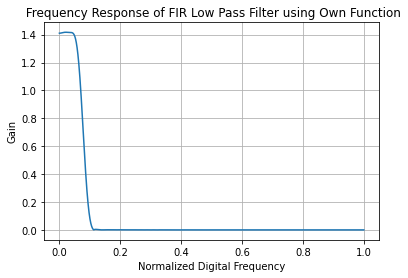

In [16]:
W,H = freqz(h, worN = 8000)
plt.plot((W/max(W)), np.absolute(H))
plt.xlabel('Normalized Digital Frequency')
plt.ylabel('Gain')
plt.title(' Frequency Response of FIR Low Pass Filter')
plt.grid(True)